## Here we will classify data from a satellite MODIS available on HUGGINGFACE

# For downloading data from HUGGINGFACE we need to install DATASET Module using 
#!pip install dataset

In [1]:
import datasets

In [53]:
# Importing needed Modules
import pandas as pd
import os # for making directories
import seaborn as sns

In [3]:
data_url="nasa-cisto-data-science-group/modis-lake-powell-toy-dataset"

In [4]:
sat_data= datasets.load_dataset(data_url)

Using custom data configuration nasa-cisto-data-science-group--modis-lake-powell-toy-dataset-cfc94c54a1439d3a


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to C:\Users\nikhi\.cache\huggingface\datasets\nasa-cisto-data-science-group___csv\nasa-cisto-data-science-group--modis-lake-powell-toy-dataset-cfc94c54a1439d3a\0.0.0\51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
sat_data_train=pd.DataFrame(sat_data["train"])

In [6]:
sat_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   water           800 non-null    int64
 1   sur_refl_b01_1  800 non-null    int64
 2   sur_refl_b02_1  800 non-null    int64
 3   sur_refl_b03_1  800 non-null    int64
 4   sur_refl_b04_1  800 non-null    int64
 5   sur_refl_b05_1  800 non-null    int64
 6   sur_refl_b06_1  800 non-null    int64
 7   sur_refl_b07_1  800 non-null    int64
 8   ndvi            800 non-null    int64
 9   ndwi1           800 non-null    int64
 10  ndwi2           800 non-null    int64
dtypes: int64(11)
memory usage: 68.9 KB


In [7]:
sat_data_train.describe()

,water,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,ndvi,ndwi1,ndwi2
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.506250,1209.758750,1577.253750,743.000000,1028.395000,1969.371250,1932.658750,1587.696250,87.131250,-2336.037500,-914.291250
std,0.500274,1287.886517,1554.828794,1004.334475,1065.582946,1467.613243,1541.910775,1395.266352,2518.736818,3404.038705,3863.695634
min,0.000000,8.000000,1.000000,-100.000000,6.000000,-92.000000,51.000000,0.000000,-9493.000000,-9862.000000,-9692.000000
25%,0.000000,238.250000,168.000000,286.000000,413.000000,553.500000,511.250000,316.750000,-1533.000000,-4577.500000,-2846.250000
50%,1.000000,886.500000,1394.000000,540.000000,809.500000,1818.500000,1498.500000,1174.000000,733.500000,-1582.000000,-703.500000
75%,1.000000,1893.250000,2667.750000,857.000000,1313.250000,3210.750000,3254.250000,2672.000000,1729.500000,-766.500000,869.000000
max,1.000000,9222.000000,8837.000000,8909.000000,9162.000000,6382.000000,6610.000000,6128.000000,8587.000000,8823.000000,10000.000000


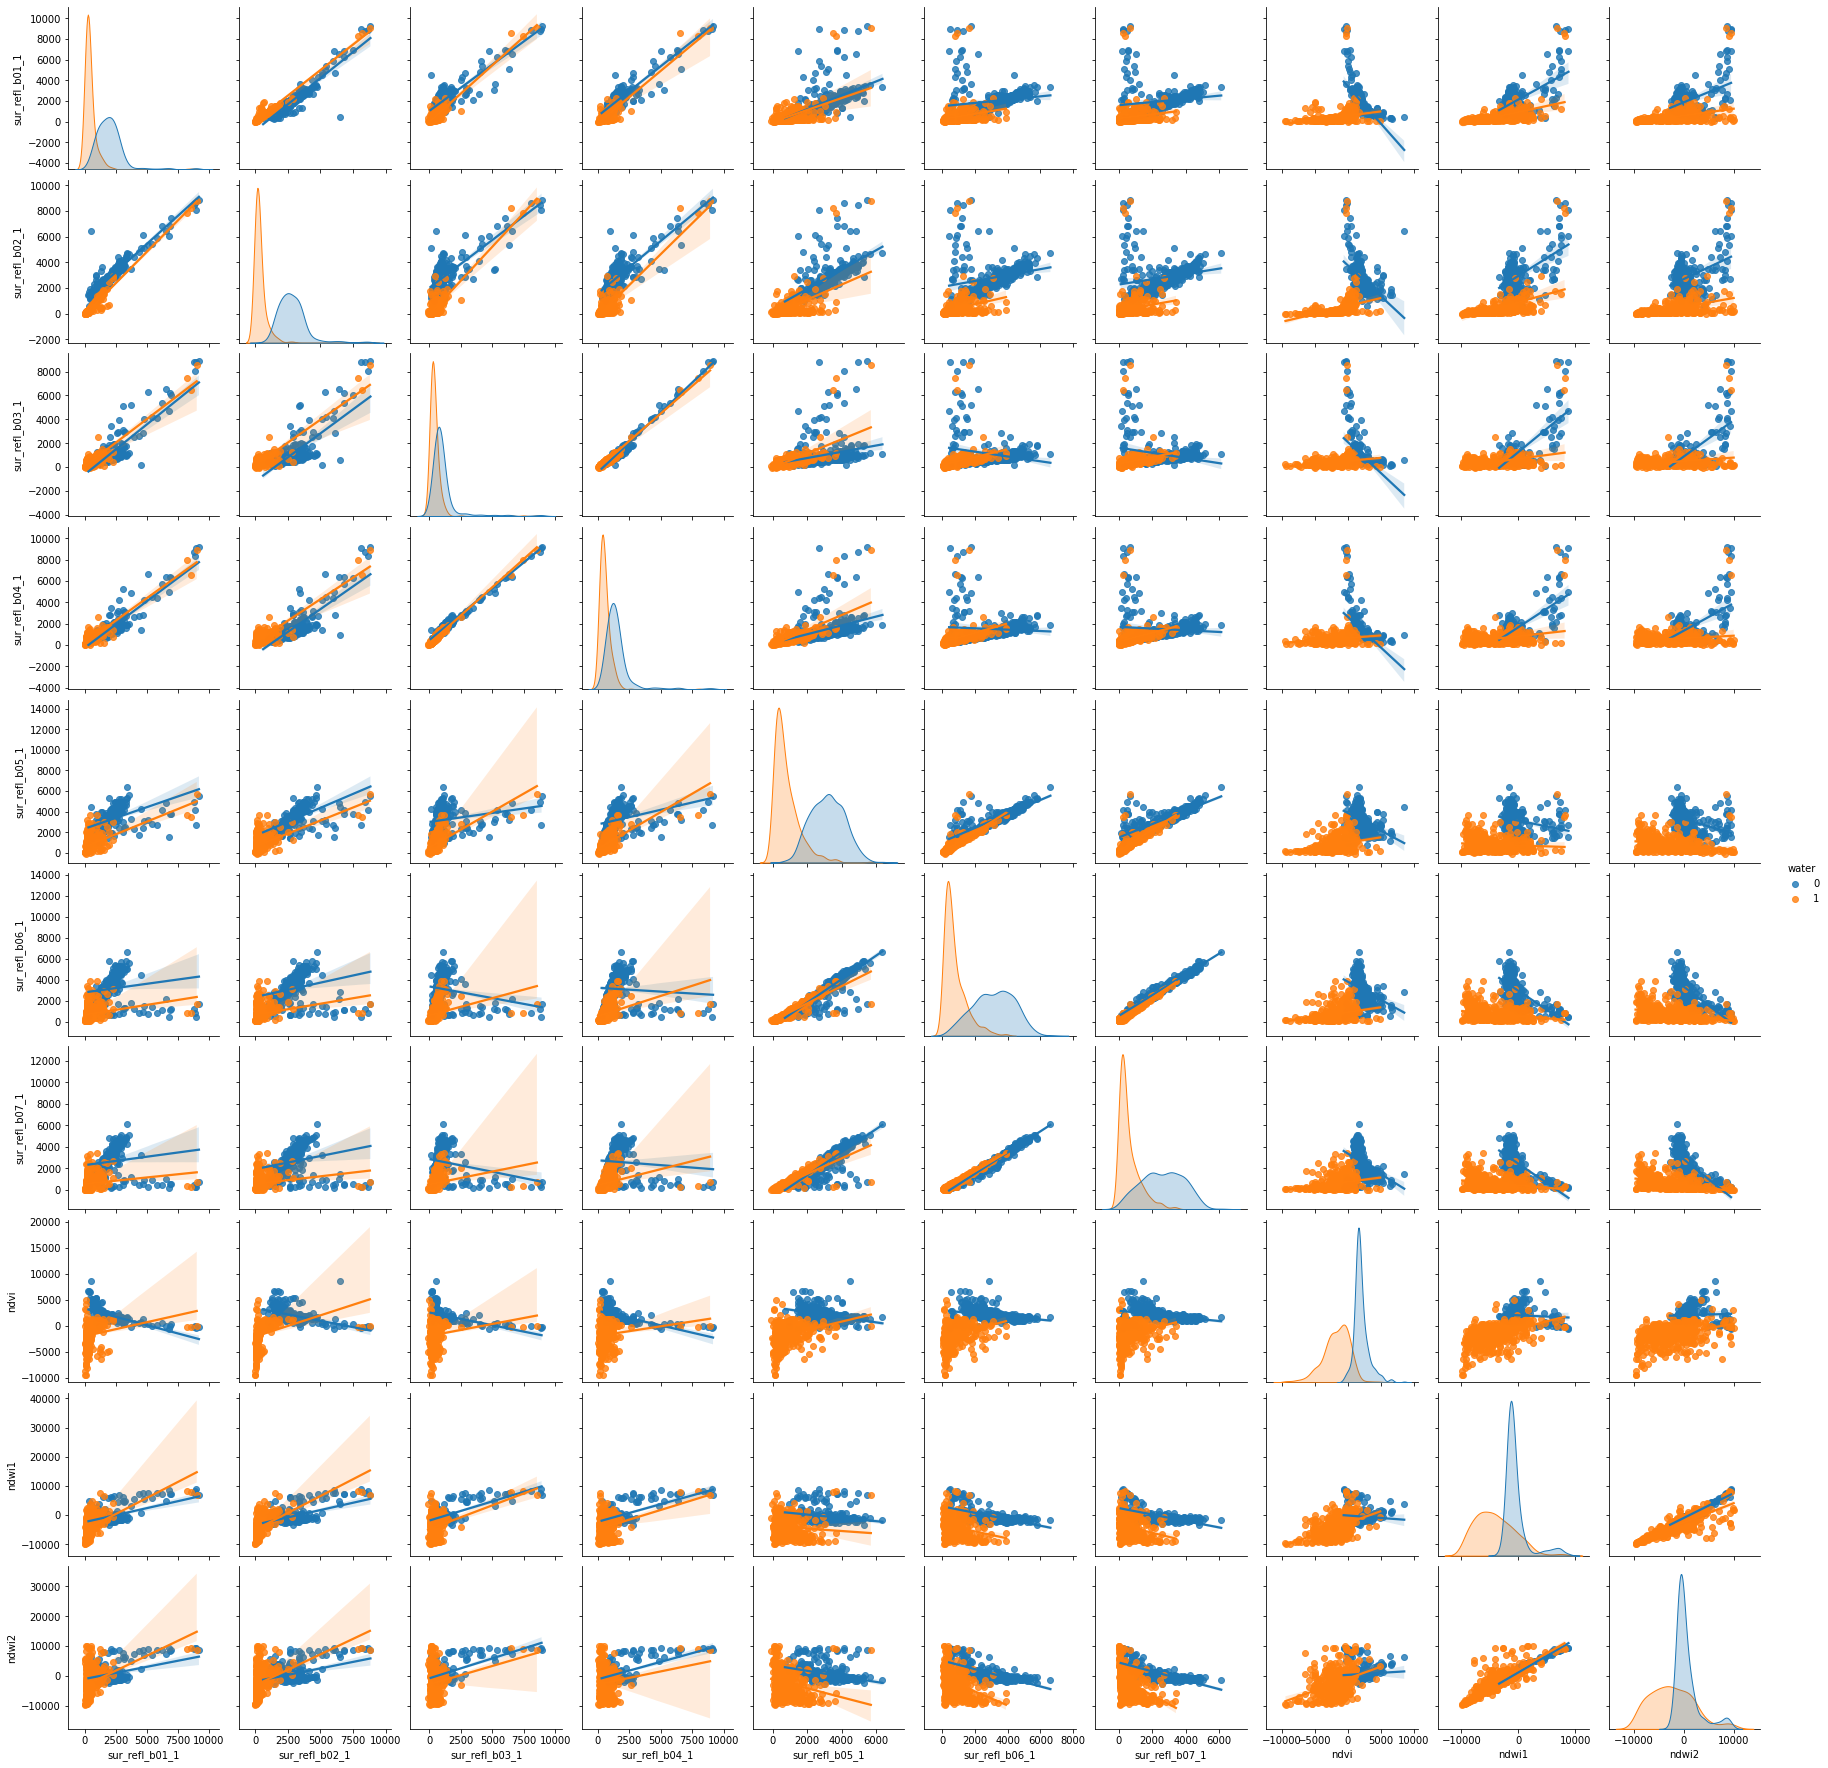

In [8]:
sns.pairplot(sat_data_train, hue="water", kind='reg')

array([[<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'sur_refl_b01_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b02_1'}>],
       [<AxesSubplot:title={'center':'sur_refl_b03_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b04_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b05_1'}>],
       [<AxesSubplot:title={'center':'sur_refl_b06_1'}>,
        <AxesSubplot:title={'center':'sur_refl_b07_1'}>,
        <AxesSubplot:title={'center':'ndvi'}>],
       [<AxesSubplot:title={'center':'ndwi1'}>,
        <AxesSubplot:title={'center':'ndwi2'}>, <AxesSubplot:>]],
      dtype=object)

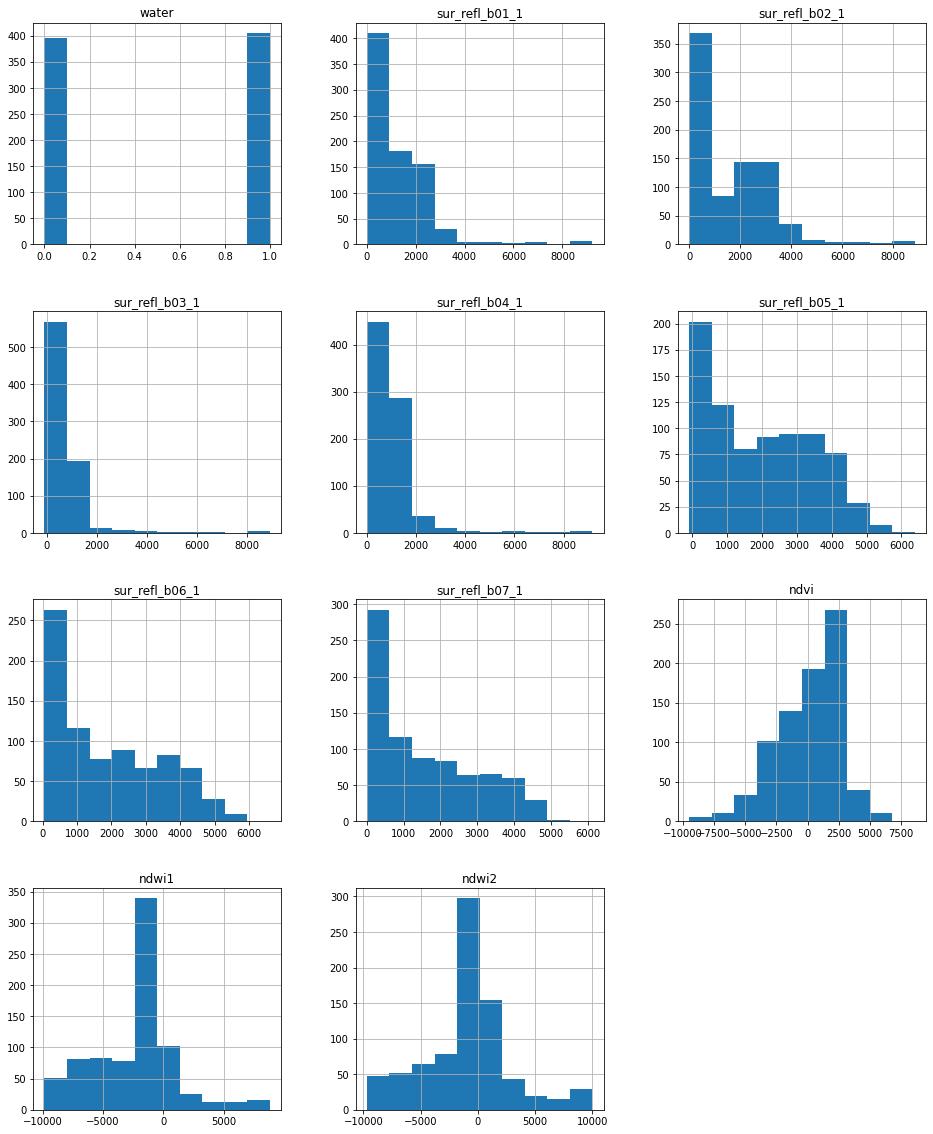

In [9]:
sat_data_train.hist(figsize=(16,20))

<AxesSubplot:>

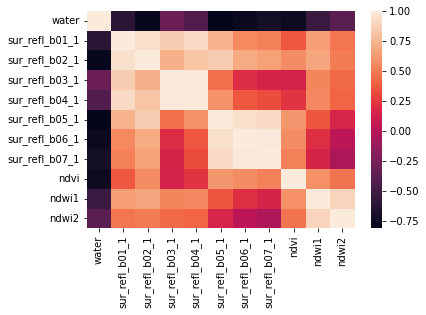

In [10]:
sns.heatmap(sat_data_train.corr())

In [11]:
# full correlation table
sat_data_train.corr().style.background_gradient(cmap='viridis')

,water,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,ndvi,ndwi1,ndwi2
water,1.000000,-0.604949,-0.780173,-0.315886,-0.431506,-0.813848,-0.769546,-0.720314,-0.751600,-0.536501,-0.382001
sur_refl_b01_1,-0.604949,1.000000,0.945684,0.857138,0.918364,0.736051,0.555226,0.520304,0.365613,0.644189,0.479509
sur_refl_b02_1,-0.780173,0.945684,1.000000,0.725588,0.814153,0.854383,0.699178,0.653082,0.574397,0.676687,0.499082
sur_refl_b03_1,-0.315886,0.857138,0.725588,1.000000,0.979398,0.447638,0.195292,0.152493,0.148278,0.540643,0.427898
sur_refl_b04_1,-0.431506,0.918364,0.814153,0.979398,1.000000,0.592604,0.365734,0.324536,0.224591,0.547416,0.407715
sur_refl_b05_1,-0.813848,0.736051,0.854383,0.447638,0.592604,1.000000,0.948514,0.919976,0.611504,0.362238,0.163515
sur_refl_b06_1,-0.769546,0.555226,0.699178,0.195292,0.365734,0.948514,1.000000,0.991028,0.571557,0.203993,0.023099
sur_refl_b07_1,-0.720314,0.520304,0.653082,0.152493,0.324536,0.919976,0.991028,1.000000,0.519074,0.156148,-0.038017
ndvi,-0.751600,0.365613,0.574397,0.148278,0.224591,0.611504,0.571557,0.519074,1.000000,0.588516,0.469716
ndwi1,-0.536501,0.644189,0.676687,0.540643,0.547416,0.362238,0.203993,0.156148,0.588516,1.000000,0.890413


In [12]:
#we can see here band b02,b05, b06, b07, ndvi are highly correlated to water
data_to_feed=sat_data_train.loc[:,sat_data_train.corr()["water"]<-.70]

In [13]:
trainng_columns=data_to_feed.columns

In [14]:
from sklearn.cluster import KMeans

In [15]:
x_train=data_to_feed.values

In [16]:
k_mean_model=KMeans(n_clusters=2)

In [17]:
k_mean_model.fit(x_train)

KMeans(n_clusters=2)

In [18]:
labels= k_mean_model.labels_

In [19]:
labels
sat_data_train["k_mean_pred"]=labels

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
true_val= sat_data_train['water'].values
pred_val=sat_data_train['k_mean_pred'].values

In [22]:
accuracy_score(true_val,pred_val)

0.0275

In [23]:
# we got accuracy of  97 percent

In [24]:
# let us check this for test data

In [25]:
sat_data_test=pd.DataFrame(sat_data['test'])


In [26]:
ytest=sat_data_test[trainng_columns].values

In [27]:
y_pred=k_mean_model.predict(ytest)

In [28]:
sat_data_test["prediction"]=y_pred

In [29]:
accuracy_score(sat_data_test['water'].values, y_pred)

0.02

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(sat_data_test['water'].values, y_pred)

array([[  0, 105],
       [ 91,   4]], dtype=int64)

In [32]:
# now try withn raster data


In [25]:
from huggingface_hub import snapshot_download
import glob
import os
import rasterio
import numpy as np
from osgeo import gdal

In [3]:
raster_dataset = snapshot_download(repo_id="nasa-cisto-data-science-group/modis-lake-powell-raster-dataset", repo_type='dataset')

Downloading:   0%|          | 0.00/141k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.38M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.44M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.63M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.65M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/366 [00:00<?, ?B/s]

In [10]:
fileList = sorted([file for file in glob.glob(os.path.join(raster_dataset, 'IL.*.Powell.*.tif')) if 'sur_refl' in file])

In [38]:
def readRastersToArray(fileList):
    rasterProjection = None
    newshp = (1300*1300, 10)
    img = np.empty(newshp, dtype=np.int16)
    for i, fileName in enumerate(fileList):
        ds = gdal.Open(fileName)
        img[:, i] = ds.GetRasterBand(1).ReadAsArray().astype(np.int16).ravel()
        if i == 0:
            rasterProjection = ds.GetProjection()
        ds = None
    img[:, len(fileList)] = ((img[:, 1] - img[:, 0]) / (img[:, 1] + img[:, 0])) * 10000
    img[:, len(fileList)+1] = ((img[:, 1] - img[:, 5]) / (img[:, 1] + img[:, 5])) * 10000
    img[:, len(fileList)+2] = ((img[:, 1] - img[:, 6]) / (img[:, 1] + img[:, 6])) * 10000
    return img, rasterProjection


In [39]:
img, projection = readRastersToArray(fileList)

C:\Users\nikhi\AppData\Local\Temp/ipykernel_8764/3212879994.py:11: RuntimeWarning: divide by zero encountered in true_divide
  img[:, len(fileList)] = ((img[:, 1] - img[:, 0]) / (img[:, 1] + img[:, 0])) * 10000
C:\Users\nikhi\AppData\Local\Temp/ipykernel_8764/3212879994.py:13: RuntimeWarning: divide by zero encountered in true_divide
  img[:, len(fileList)+2] = ((img[:, 1] - img[:, 6]) / (img[:, 1] + img[:, 6])) * 10000


In [57]:
pd.DataFrame(img)

,0,1,2,3,4,5,6,7,8,9
0,1547,2461,857,1256,2684,2730,2222,2280,-518,510
1,1474,2377,857,1256,2684,2730,2222,2344,-691,337
2,1474,2377,846,1230,2630,2613,2098,2344,-472,623
3,1494,2461,846,1230,2630,2613,2098,2445,-299,796
4,1494,2461,846,1230,2630,2613,2098,2445,-299,796
...,...,...,...,...,...,...,...,...,...,...
1689995,2211,2826,1080,1796,3650,4266,3862,1220,-2030,-1549
1689996,2209,2801,1028,1791,3633,4223,3863,1181,-2024,-1593
1689997,2358,2979,1028,1791,3633,4223,3863,1163,-1727,-1292
1689998,2425,3069,1117,1876,3747,4345,3919,1172,-1721,-1216


In [106]:
src=rasterio.open(fileList[0])

In [107]:
fileList

['C:\\Users\\nikhi/.cache\\huggingface\\hub\\datasets--nasa-cisto-data-science-group--modis-lake-powell-raster-dataset\\snapshots\\434ef3fa52a4710b909b83e640c1144afc1a2336\\IL.2001155.Powell.20220871535-sur_refl_b01_1.tif',
 'C:\\Users\\nikhi/.cache\\huggingface\\hub\\datasets--nasa-cisto-data-science-group--modis-lake-powell-raster-dataset\\snapshots\\434ef3fa52a4710b909b83e640c1144afc1a2336\\IL.2001155.Powell.20220871535-sur_refl_b02_1.tif',
 'C:\\Users\\nikhi/.cache\\huggingface\\hub\\datasets--nasa-cisto-data-science-group--modis-lake-powell-raster-dataset\\snapshots\\434ef3fa52a4710b909b83e640c1144afc1a2336\\IL.2001155.Powell.20220871535-sur_refl_b03_1.tif',
 'C:\\Users\\nikhi/.cache\\huggingface\\hub\\datasets--nasa-cisto-data-science-group--modis-lake-powell-raster-dataset\\snapshots\\434ef3fa52a4710b909b83e640c1144afc1a2336\\IL.2001155.Powell.20220871535-sur_refl_b04_1.tif',
 'C:\\Users\\nikhi/.cache\\huggingface\\hub\\datasets--nasa-cisto-data-science-group--modis-lake-powell-

In [108]:
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd

In [126]:
check=rasterio.open(fileList[0])
sr=gdal.Open(fileList[0])
sr.ReadAsArray()

array([[1547, 1474, 1474, ..., 3151, 3151, 3087],
       [1395, 1395, 1379, ..., 3323, 3323, 3148],
       [1408, 1403, 1379, ..., 3223, 3223, 3203],
       ...,
       [2196, 2186, 2255, ..., 2193, 2253, 2230],
       [2186, 2255, 2341, ..., 2154, 2235, 2217],
       [2320, 2439, 2169, ..., 2358, 2425, 2402]], dtype=int16)

In [127]:
gpd.read_file(fileList[0])


DriverError: 'C:\Users\nikhi/.cache\huggingface\hub\datasets--nasa-cisto-data-science-group--modis-lake-powell-raster-dataset\snapshots\434ef3fa52a4710b909b83e640c1144afc1a2336\IL.2001155.Powell.20220871535-sur_refl_b01_1.tif' not recognized as a supported file format.

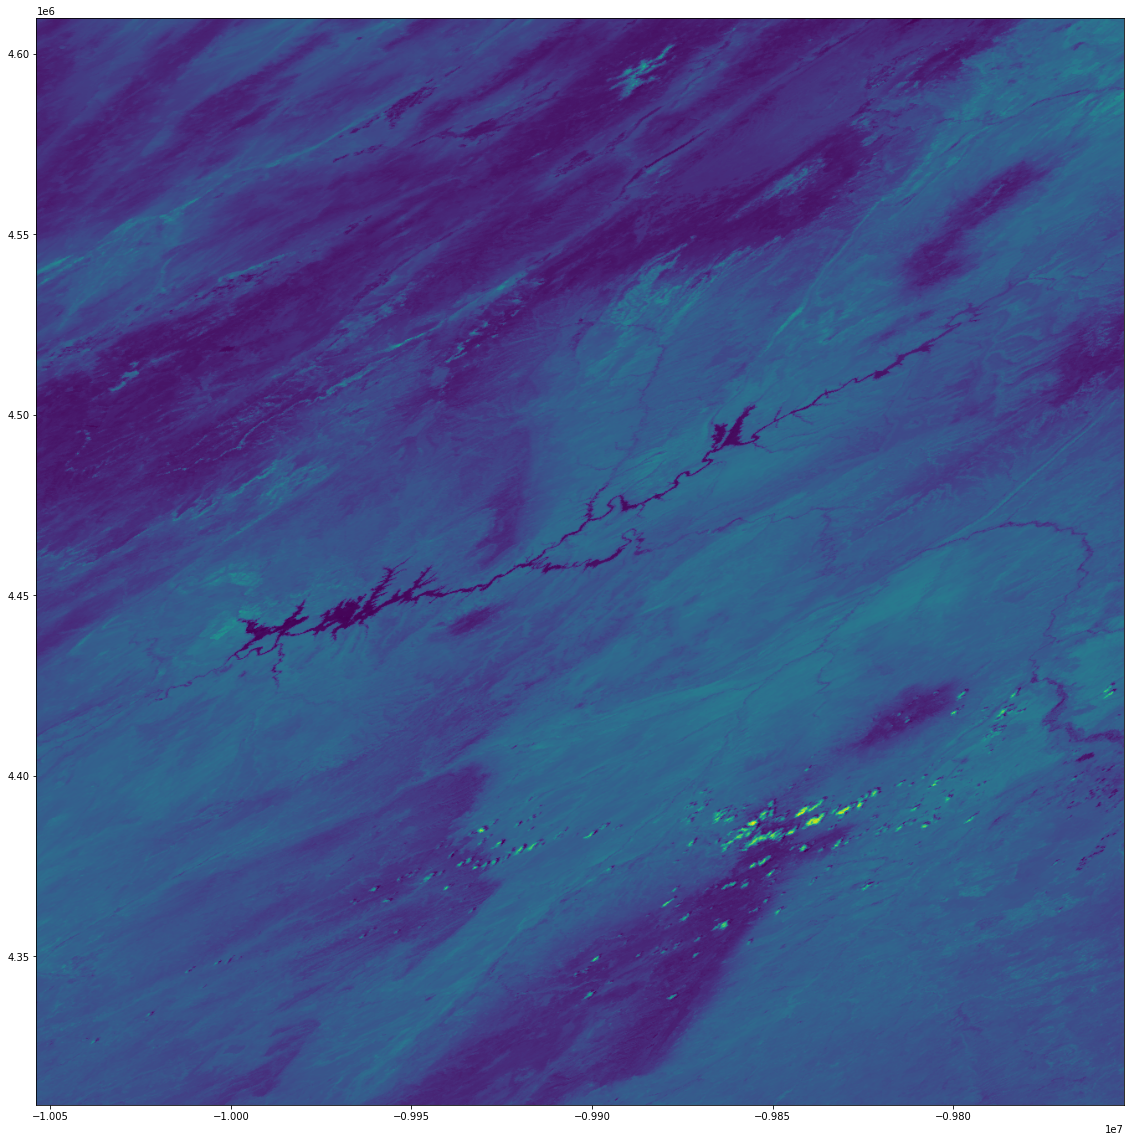

In [109]:

fig, ax = plt.subplots(figsize=(20,20))
# fig(figsize=(20,20))/

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = show(src, extent=extent, ax=ax)

# gdf.plot(ax=ax)

In [103]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

('Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co